# Stop clustering
Clustering of public transit stops by agglomerative clustering

In [1]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from pyproj import Proj, transform
import numpy as np
import matplotlib.pyplot as plt
from random import randint

from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.io import output_notebook
output_notebook()
from bokeh.tile_providers import CARTODBPOSITRON

%matplotlib inline

Loading BokehJS ...

In [2]:
# path to a gtfs-stops-file
stops_path = r"D:\data\90_divers\gtfsfp20192019-04-17\stops.txt"

In [3]:
df_stops = pd.read_csv(stops_path, sep=",")
print len(df_stops)
# restrict stops to Switzerland
df_stops_ch = df_stops[df_stops["stop_id"].str.startswith("85")]
print len(df_stops_ch)

30566
28878


In [4]:
df_stops_ch.head()

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
1667,8500010,Basel SBB,47.547407,7.589551,NaN,8500010P
1668,8500010:0:1,Basel SBB,47.547467,7.589551,NaN,8500010P
1669,8500010:0:10,Basel SBB,47.548316,7.589551,NaN,8500010P
1670,8500010:0:11,Basel SBB,47.548255,7.589551,NaN,8500010P
1671,8500010:0:11AB,Basel SBB,47.547892,7.589551,NaN,8500010P


In [5]:
latlons_ch = df_stops_ch[["stop_lat", "stop_lon"]].values
names_ch = df_stops_ch["stop_name"]

In [6]:
from_proj  = Proj("+init=EPSG:4326") # WGS84
to_proj  = Proj("+init=EPSG:3857") # web mercator
xys_ch = [transform(from_proj, to_proj, lon, lat) for lat, lon in latlons_ch]

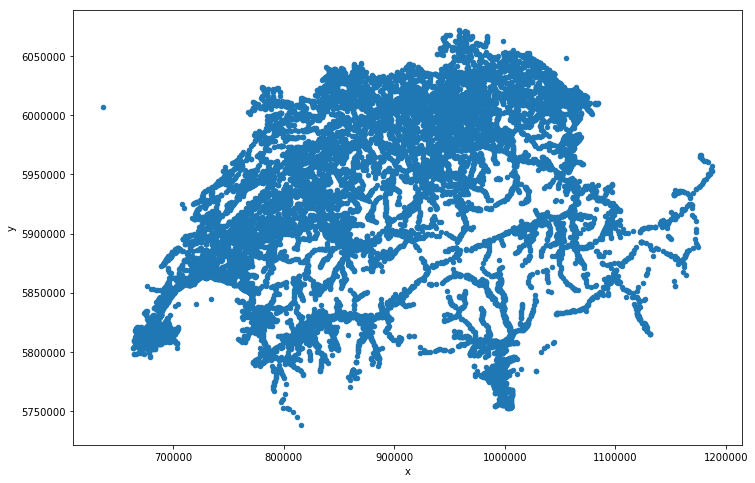

In [7]:
df_xys_ch = pd.DataFrame(xys_ch, columns=["x", "y"])
df_xys_ch.plot.scatter("x", "y", figsize=(12, 8))

In [8]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=2000)

In [9]:
%%time
clustering.fit(xys_ch)

Wall time: 39.8 s


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=2000,
            pooling_func=<function mean at 0x0000000005E3B208>)

In [10]:
def get_new_random_color(colors_so_far):
    def get_random_color():
        return (randint(0, 255) / 255., randint(0, 255) / 255., randint(0, 255) / 255.)
    while(True):
        new_color = get_random_color()
        if new_color in  colors_so_far:
            continue
        else:
            colors_so_far.add(new_color)
            return new_color

In [11]:
def get_colors(labels):
    clusters = set(labels)
    colors_so_far = set()
    colors_per_cluster = {}
    for c in clusters:
        colors_per_cluster[c] = get_new_random_color(colors_so_far)
    colors = [colors_per_cluster[l] for l in labels]
    return colors

In [12]:
def plot_clustering(xys, labels):
    plt.figure(figsize=(12, 8))
    plt.scatter(zip(*xys_ch)[0], zip(*xys_ch)[1], c=get_colors(labels))

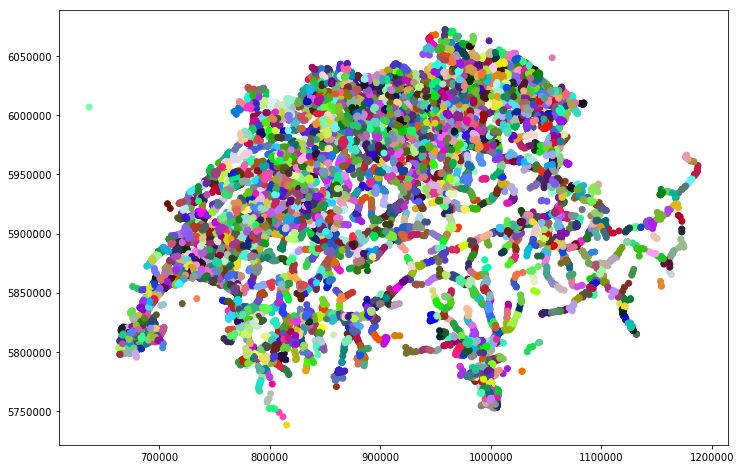

In [13]:
plot_clustering(xys_ch, clustering.labels_)

In [14]:
def plot_clustering_bokeh(xys, labels, names):
    
    source = ColumnDataSource(data=dict(
        x=zip(*xys_ch)[0],
        y=zip(*xys_ch)[1],
        labels=labels,
        names=names,
        colors = ["#%02x%02x%02x" % (int(r * 255), int(g * 255), int(b * 255)) for r, g, b in get_colors(labels)]
    ))
    TOOLTIPS = [
        ("cluster", "@labels"),
        ("name", "@names"),
    ]
    
    TOOLS = "hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

    p = figure(tools=TOOLS, tooltips=TOOLTIPS, plot_width=900, plot_height=600, match_aspect=True, x_axis_type="mercator", y_axis_type="mercator")   
    p.circle('x', 
             'y', 
             source=source,
             size=10,
             color='colors',
             alpha=0.6,
            )
    p.add_tile(CARTODBPOSITRON)

    output_file("stop_clustering.html", title="pt stop clustering")
    show(p)

In [15]:
plot_clustering_bokeh(xys_ch, clustering.labels_, names_ch)

ValueError: expected an element of either Auto or Enum('linear', 'log', 'datetime'), got 'mercator'

In [16]:
import sys
sys.version

'2.7.13 |Anaconda 4.3.1 (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]'

In [ ]:
!pip uninstall bokeh

In [17]:
!pip freeze

alabaster==0.7.9
anaconda-client==1.6.0
anaconda-navigator==1.5
anaconda-project==0.4.1
argcomplete==1.0.0
astroid==1.4.9
astropy==1.3
Babel==2.3.4
backports-abc==0.5
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.4.0.2
beautifulsoup4==4.5.3
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.4
boto==2.45.0
Bottleneck==1.2.0
branca==0.2.0
cdecimal==2.3
cffi==1.9.1
chardet==2.3.0
chest==0.2.3
ckanapi==4.1
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.2.2
clyent==1.2.2
colorama==0.3.7
comtypes==1.1.2
conda==4.3.14
configobj==5.0.6
configparser==3.5.0
contextlib2==0.5.4
cryptography==1.7.1
cycler==0.10.0
Cython==0.25.2
cytoolz==0.8.2
dask==0.13.0
datashape==0.5.4
decorator==4.0.11
descartes==1.1.0
dill==0.2.5
docopt==0.6.2
docutils==0.13.1
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
Fiona==1.7.8
Flask==0.12
Flask-Cors==3.0.2
folium==0.3.0
funcsigs==1.0.2
functools32==3.2.3.post2
futures==3.0.5
GDAL==2.1.4
geojson==1.3.5
geopandas==0.2.1
gevent==1.2.1
gm

You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
